<a href="https://colab.research.google.com/github/tpujianto/LendingClub_Loan_Prediction/blob/master/loan_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction
## Based on Lending Club Data

A capstone project for Springboard Data Science Career Track Program.

### Import Data

In [1]:
# Google Colab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Essentials
import numpy as np
import pandas as pd

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1-ZPcOoFPnfNPYSi9Px774pRbP7vRTP3R/view?usp=sharing'

In [4]:
downloaded = drive.CreateFile({'id':'1-ZPcOoFPnfNPYSi9Px774pRbP7vRTP3R'}) 
downloaded.GetContentFile('data_clean.csv')  
df = pd.read_csv('data_clean.csv')

# Dataset is now stored in a Pandas Dataframe
print('The shape of dataframe: ', df.shape)

The shape of dataframe:  (2260701, 44)


## Modeling

In [ ]:
!pip install pycaret==2.0

In [6]:
from pycaret.classification import * 
clf = setup(df, target='target', sampling=False)

Setup Succesfully Completed!


,Description,Value
0,session_id,5449
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2260701, 44)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
whitelist = ['catboost', 'lightgbm', 'gbc', 'rf', 'knn']

In [ ]:
compare_models(fold=5, sort='AUC', whitelist=whitelist)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7568,0.8360,0.7805,0.7612,0.7707,0.5120,0.5121,63.8516
1,Light Gradient Boosting Machine,0.7328,0.8031,0.7754,0.7308,0.7524,0.4627,0.4637,3.6287
2,Gradient Boosting Classifier,0.6678,0.7274,0.7102,0.6734,0.6913,0.3324,0.3329,1032.0488
3,Random Forest Classifier,0.6219,0.6707,0.5766,0.6589,0.6150,0.2469,0.2490,11.3751
4,K Neighbors Classifier,0.5327,0.5439,0.5638,0.5528,0.5583,0.0623,0.0623,744.4443


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7fcf1ff0cf28>
INFO:logs:compare_models() succesfully completed......................................


In [7]:
model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7580,0.8372,0.7820,0.7621,0.7719,0.5143,0.5145
1,0.7582,0.8373,0.7818,0.7625,0.7720,0.5147,0.5148
2,0.7557,0.8351,0.7786,0.7606,0.7695,0.5098,0.5099
3,0.7566,0.8360,0.7801,0.7611,0.7705,0.5115,0.5117
4,0.7565,0.8367,0.7794,0.7613,0.7702,0.5113,0.5114
5,0.7582,0.8364,0.7800,0.7635,0.7717,0.5149,0.5150
6,0.7580,0.8370,0.7798,0.7633,0.7715,0.5145,0.5146
7,0.7586,0.8380,0.7812,0.7634,0.7722,0.5156,0.5157
8,0.7576,0.8363,0.7810,0.7620,0.7714,0.5135,0.5137
9,0.7561,0.8351,0.7784,0.7613,0.7698,0.5106,0.5107


In [ ]:
!pip install scikit-plot

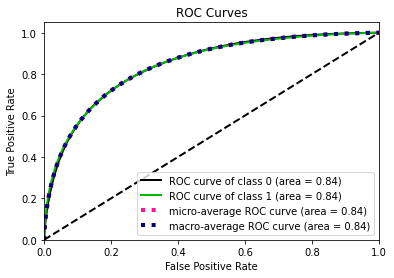

In [10]:
import scikitplot as skplt
import matplotlib.pyplot as plt


y_true = clf[1]
y_probas = model.predict_proba(clf[0])
skplt.metrics.plot_roc_curve(y_true, model.predict_proba(clf[0]))
plt.show()


In [ ]:
!pip install shap

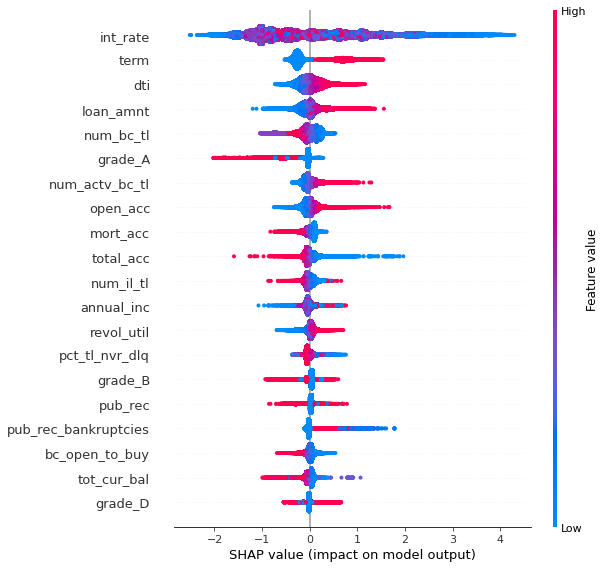

In [15]:
interpret_model(model)

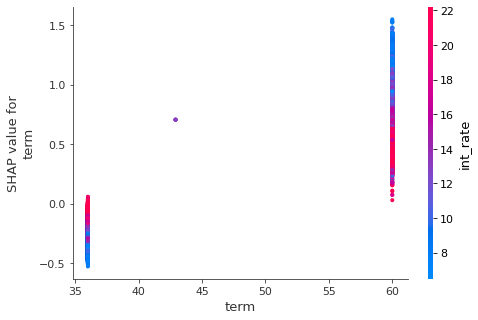

In [13]:
interpret_model(model, plot='correlation')

In [16]:
# make predictions
predictions = predict_model(model)
# view the predictions
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7571,0.8364,0.7809,0.7614,0.771,0.5125,0.5127


,term,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,...,verification_status_Source Verified,verification_status_Verified,verification_status_not_available,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_not_available,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,grade_not_available,emp_length_0,emp_length_1,emp_length_10,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,target,Label,Score
0,60.0,10000.0,15.88,61000.0,23.49,0.0,1.0,6.0,1.0,27827.0,86.2,13.0,0.0,0.0,0.0,46253.0,2.0,3789.0,0.0,0.0,64.0,340.0,10.0,2.0,4.0,77.0,3.0,0.0,4.0,5.0,2.0,0.0,0.0,2.0,100.0,1.0,46253.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.3119
1,36.0,10000.0,10.41,45000.0,13.31,0.0,3.0,13.0,0.0,16904.0,30.2,22.0,0.0,0.0,0.0,17222.0,2.0,27598.0,0.0,0.0,108.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,3.0,0.0,0.0,1.0,95.5,0.0,17222.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9072
2,60.0,12000.0,25.11,41200.0,24.18,11.0,1.0,9.0,0.0,4402.0,80.0,17.0,0.0,0.0,0.0,70744.0,2.0,67.0,0.0,0.0,83.0,124.0,29.0,6.0,1.0,91.0,6.0,1.0,2.0,3.0,4.0,0.0,0.0,1.0,23.5,0.0,17856.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.8180
3,36.0,3600.0,24.99,30000.0,20.10,0.0,0.0,7.0,0.0,14899.0,102.8,10.0,0.0,0.0,0.0,14899.0,0.0,0.0,0.0,0.0,130.0,191.0,115.0,115.0,0.0,115.0,5.0,0.0,7.0,10.0,0.0,0.0,0.0,0.0,100.0,0.0,14899.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5495
4,36.0,8000.0,12.49,95000.0,5.42,0.0,1.0,8.0,2.0,10006.0,29.9,12.0,0.0,0.0,100.0,237387.0,5.0,16928.0,0.0,0.0,144.0,226.0,5.0,5.0,1.0,16.0,3.0,0.0,2.0,4.0,1.0,0.0,0.0,2.0,100.0,1.0,10006.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678206,60.0,15500.0,10.72,90000.0,26.93,0.0,2.0,11.0,0.0,9786.0,20.9,35.0,0.0,0.0,0.0,101549.0,7.0,25959.0,0.0,0.0,160.0,130.0,1.0,1.0,3.0,8.0,1.0,0.0,3.0,8.0,18.0,0.0,0.0,4.0,100.0,0.0,101549.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9327
678207,60.0,10000.0,15.31,95000.0,24.96,1.0,1.0,12.0,0.0,30847.0,52.4,22.0,0.0,0.0,0.0,65863.0,2.0,6875.0,0.0,0.0,143.0,337.0,8.0,8.0,2.0,32.0,2.0,0.0,4.0,6.0,5.0,0.0,0.0,1.0,95.5,0.0,65863.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

In [17]:
finalize_model(model)

In [ ]:
save_model(model, 'loan_prediction_catboost')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=<catboost.core.CatBoostClassifier object at 0x7fcf205b3cc0>, model_name=loan_prediction_catboost, verbose=True)
INFO:logs:Appending prep pipeline
INFO:logs:loan_prediction_catboost.pkl saved in current working directory
INFO:logs:[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Lev...
                ('group', Empt

Transformation Pipeline and Model Succesfully Saved
